# Giới thiệu
Trong bài hướng dẫn ngắn này, mình sẽ trình bày cách làm thế nào để biểu diễn một chuỗi dữ liệu chuỗi với Python. Cụ thể hơn, một file .csv dữ liệu glucose từ thiết bị Dexcom G6 theo định dạng  của công ty được sử dụng cho bài học này. 
Bài học có các điểm chính sau:
* Giới thiệu về định dạng timestamp mà pandas có thể đọc
* Chuyển đổi từ chuỗi thành định dạng datetime
* Đọc file dữ liệu và vẽ dữ liệu với plot
* Sử dụng plotly cho việc phác vẽ nhanh


## Tổng quan về định dạng datetime
Khi ta thiết kế một hệ thống thu thập dữ liệu, ta cần gắn các nhãn thời gian dưới dạng một số định dạng chuẩn để giúp các chương trình xử lý dữ liệu dễ dàng đọc và sử dụng trao đổi giữa các hệ thống khác nhau.
* Trong pytho, định dạng được tuân theo một số dạng ghi chú như sau:
1. dd/mm/YYYY HH:MM:SS ,ví dụ: 24/05/2020 20:45:56
2. mm/dd/YYYY HH:MM:SS ,ví dụ: 05/24/2020 20:45:56
3. mm-dd-YYYY HH:MM:SS ,ví dụ: 05-24-2020 20:45:56
4. mm-dd-YYYY , ví dụ: 05-24-2020

Chi tiế có thể xem thểm ở [link](https://docs.python.org/3/library/time.html#time.time)

Để đọc một chuỗi dưới định dang datetime, chuỗi thông thường có định dạng chuẩn như sau:

format = "%d/%m/%Y %H:%M:%S.%f" time1 = now.**strftime**(format)

Đây là định dạng chuẩn [ISO 8601](https://stackabuse.com/converting-strings-to-datetime-in-python/)
Với %Y: Năm (4 chữ số) %m: Tháng %d: Ngày của tháng %H: Giờ (24 giờ) %M: Phút %S: Giây %f: micro-giây

**strftime** là một hàm trong gói package có thể chuyển đổi một chuỗi sang đối tượng datetime. Danh sách đầy đủ các ký hiệu định dạng có thể xem ở [link](https://www.programiz.com/python-programming/datetime/strftime)



### Ví dụ mô tả giờ

In [2]:
# Display the moment time in Hours
from datetime import  datetime

#current date and time
now = datetime.now()
#time format: H:M:S
format = "%H:%M:%S"
#format datetime using strftime()
time1 = now.strftime(format)

print("Formatted Date:", time1)

Formatted Date: 14:59:03


Ví dụ mô tả ngày

In [3]:
from datetime import datetime

# current date and time
now = datetime.now()
# date format: dd-mm-yyyy
format = "%d-%m-%Y"
#format datetime using strftime()
date1 = now.strftime(format)

print("Formatted Date:", date1)

Formatted Date: 19-03-2021


***Chuyện gì xảy ra nếu ta gõ sai định dạng?***

In [4]:
format = "d-%m-%Y"
date1 = now.strftime(format)

print("Formatted Date:", date1)


Formatted Date: d-03-2021


### Định dạng Datetime tiêu chuẩn ISO 8601

Trong ví dụ dưới đây, ta sẽ làm quen với định dạng theo chuẩn này. Đây là định dạng được sử dụng trong phần timestamp của tệp dữ liệu .csv của Dexcom G6.

In [5]:
from datetime import datetime

# Biểu diễn thời gian dưới dạng thông thường
x = datetime.today()
print("Normal format:", x)

Normal format: 2021-03-19 15:03:07.690555


In [6]:
# Biểu diễn thời gian dạng iso
print("Định dạng ISO 8601:", x.isoformat())
print("Định dạng ISO 8601 không có 'T':", x.isoformat(sep=' '))

Định dạng ISO 8601: 2021-03-19T15:03:07.690555
Định dạng ISO 8601 không có 'T': 2021-03-19 15:03:07.690555


Chuyển về định dạng thời gian có kèm theo múi giờ. 
Để làm việc này ta sử dụng gói thư viện **pytz** để định vị múi giờ. Cụ thể như ví dụ dưới đây.

In [8]:
import pytz

x = datetime(2021,3,15)
timezone = pytz.timezone('Asia/Seoul')
x = x.astimezone(timezone)
print("ISO 8601 format for an aware object:", x.isoformat())

ISO 8601 format for an aware object: 2021-03-15T09:00:00+09:00


## Đọc dữ liệu và sử dụng hàm plot để vẽ dữ liệu.

Để đọc tệp dữ liệu ta sẽ sử dụng hàm read_csv của pandas. 

Để biểu diễn dữ liệu timestamp với hàm *plot*, ta cần chuyển dữ liệu thời gian về định dạng **datetime64** của ***numpy***.

Trước hết ta nhập dữ liệu với hàm read_csv()

In [48]:
from pandas import read_csv
file_path = 'https://cdn.fbsbx.com/v/t59.2708-21/157799905_954914315338414_2041876922590083792_n.csv/CLARITY_Export_Nguyen_Long_2021-03-12_013007.csv?_nc_cat=103&ccb=1-3&_nc_sid=0cab14&_nc_ohc=rX7Cu5A7TDYAX_RlfiG&_nc_ht=cdn.fbsbx.com&oh=31f641f94c70e696dff1d525f45db98f&oe=60567939&dl=1'
dataset = read_csv(file_path, header=0)

Kế tiếp, ta kiểm tra 15 dòng đầu của dữ liệu này với nội dung mô tả về dữ liệu người dùng.

Ở đây ta chỉ quan tâm tới hai cột dữ liệu chính là cột *Timestamp* và cột dữ liệu *`Glucose Value`*

In [49]:
dataset.head(15)

,Index,Timestamp (YYYY-MM-DDThh:mm:ss),Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
0,1,NaN,FirstName,NaN,Long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,LastName,NaN,Nguyen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Device,NaN,NaN,Dexcom Receiver with G6,PG00804102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Alert,Fall,NaN,NaN,PG00804102,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,5,NaN,Alert,High,NaN,NaN,PG00804102,310.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,Alert,Low,NaN,NaN,PG00804102,60.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,Alert,Signal Loss,NaN,NaN,PG00804102,NaN,NaN,NaN,00:20:00,NaN,NaN,NaN
7,8,NaN,Alert,Rise,NaN,NaN,PG00804102,NaN,NaN,NaN,NaN,3.0,NaN,NaN
8,9,NaN,Alert,Urgent Low,NaN,NaN,PG00804102,55.0,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,Alert,Urgent Low Soon,NaN,NaN,PG00804102,55.0,NaN,NaN,NaN,NaN,NaN,NaN


Như ta thấy, dữ liệu bắt đầu từ dòng 11 nên ta sẽ thực hiện cắt bớt phần đầu không mang thông tin đi

In [15]:
data = dataset.values
t = data[11:,1]
glucose = data[11:,7]


Bây giờ, ta sẽ thực hiện vẽ dữ liệu với hàm plot từ các biến dữ liệu vừa thu được.

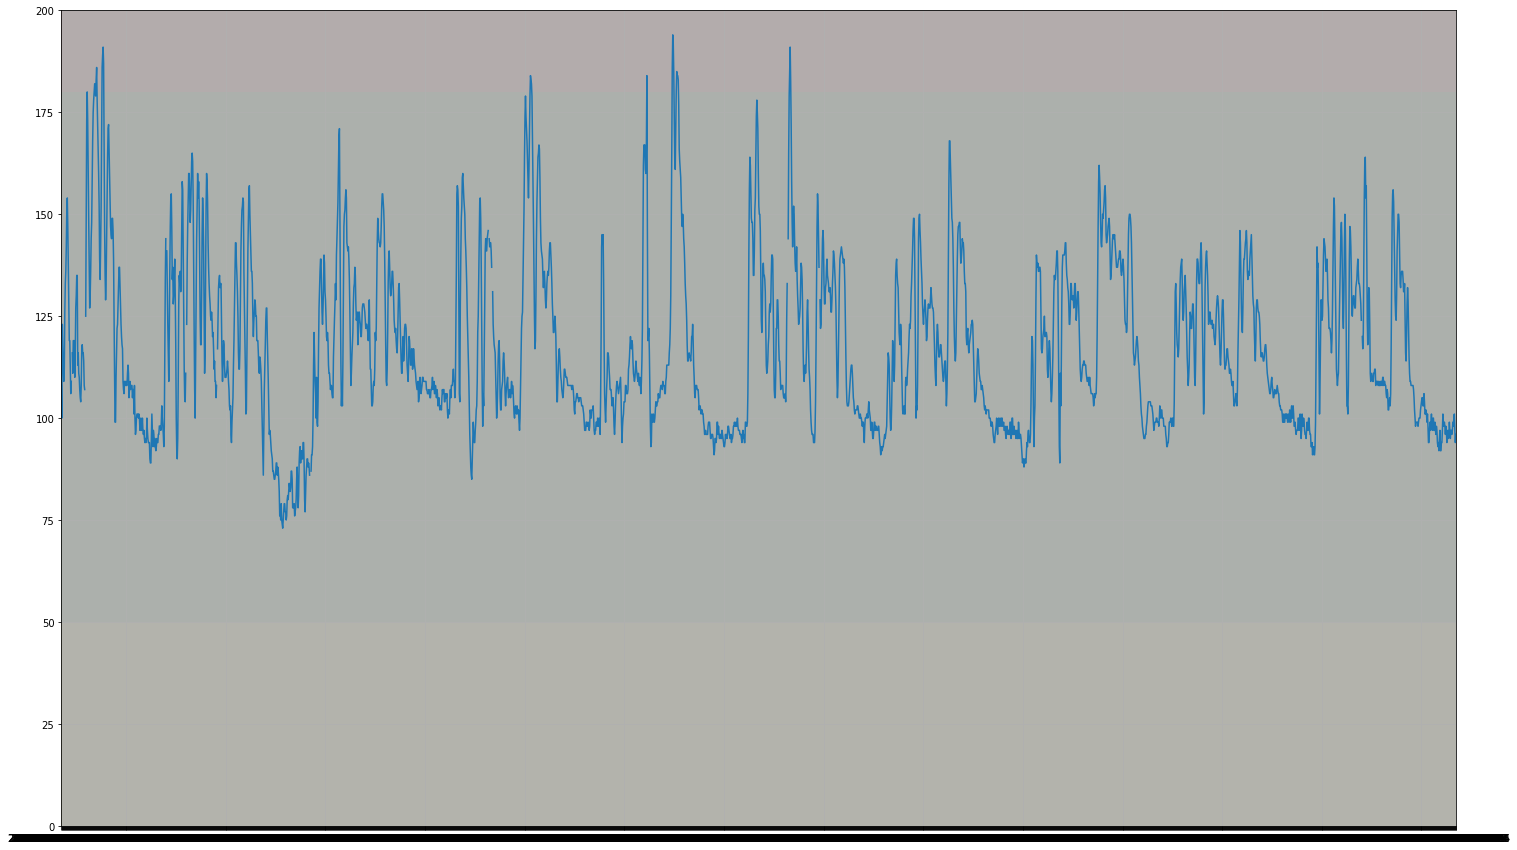

In [17]:
import matplotlib.pyplot as plt

## Plot data === impossible to display date on x axis

# plot data with different background

fig, ax = plt.subplots(1,figsize=(25,15))

ax.plot(t, glucose)
ax.grid()
ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 50, facecolor='yellow', alpha=0.6)
ax.axhspan(50, 180, facecolor='green', alpha=0.6)
ax.axhspan(180, 200, facecolor='red', alpha=0.6)

plt.show()

### Vẽ dùng định dạng **datetime64**
Như ta thấy với định dạng thời gian là chuỗi, hàm plot không thể biểu diễn trên trục x các giá trị này.

Để có thể biểu diễn được, ta cần chuyển định dạng chuỗi về dạng đối tượng datetime64 như đoạn chương trình sau

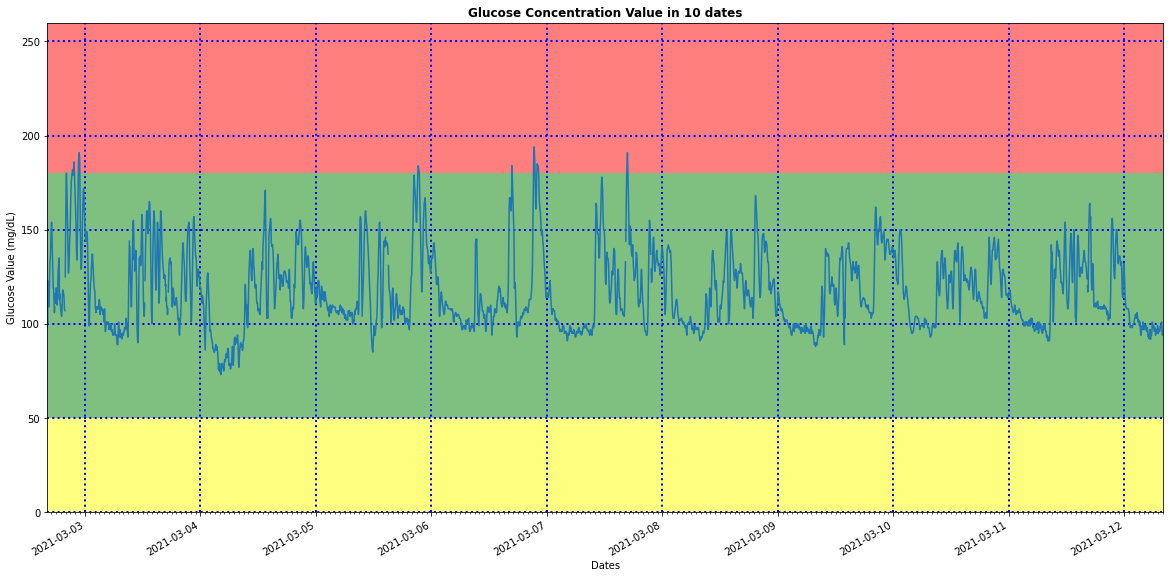

In [18]:
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 

# convert to timestamp

timenp64 = [np.datetime64(time) for time in t]

plt.rc('grid', linestyle=':', color='b', linewidth=2)
fig, ax = plt.subplots(1, figsize=(20,10))
ax.plot(timenp64, glucose)

ax.set(ylim=[0,260], ylabel='Glucose Value (mg/dL)', xlabel = 'Dates')
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator())  
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) 
ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')

ax.margins(0) # remove default margins (matplotlib verision 2+)

ax.axhspan(0, 50, facecolor='yellow', alpha=0.5)
ax.axhspan(50, 180, facecolor='green', alpha=0.5)
ax.axhspan(180, 260, facecolor='red', alpha=0.5)

ax.grid(True)
fig.autofmt_xdate() 
plt.title('Glucose Concentration Value in 10 dates', fontweight ="bold") 
plt.show()

### Vẽ dữ liệu dùng plot với sự hỗ trợ của thư viện **seaborn**

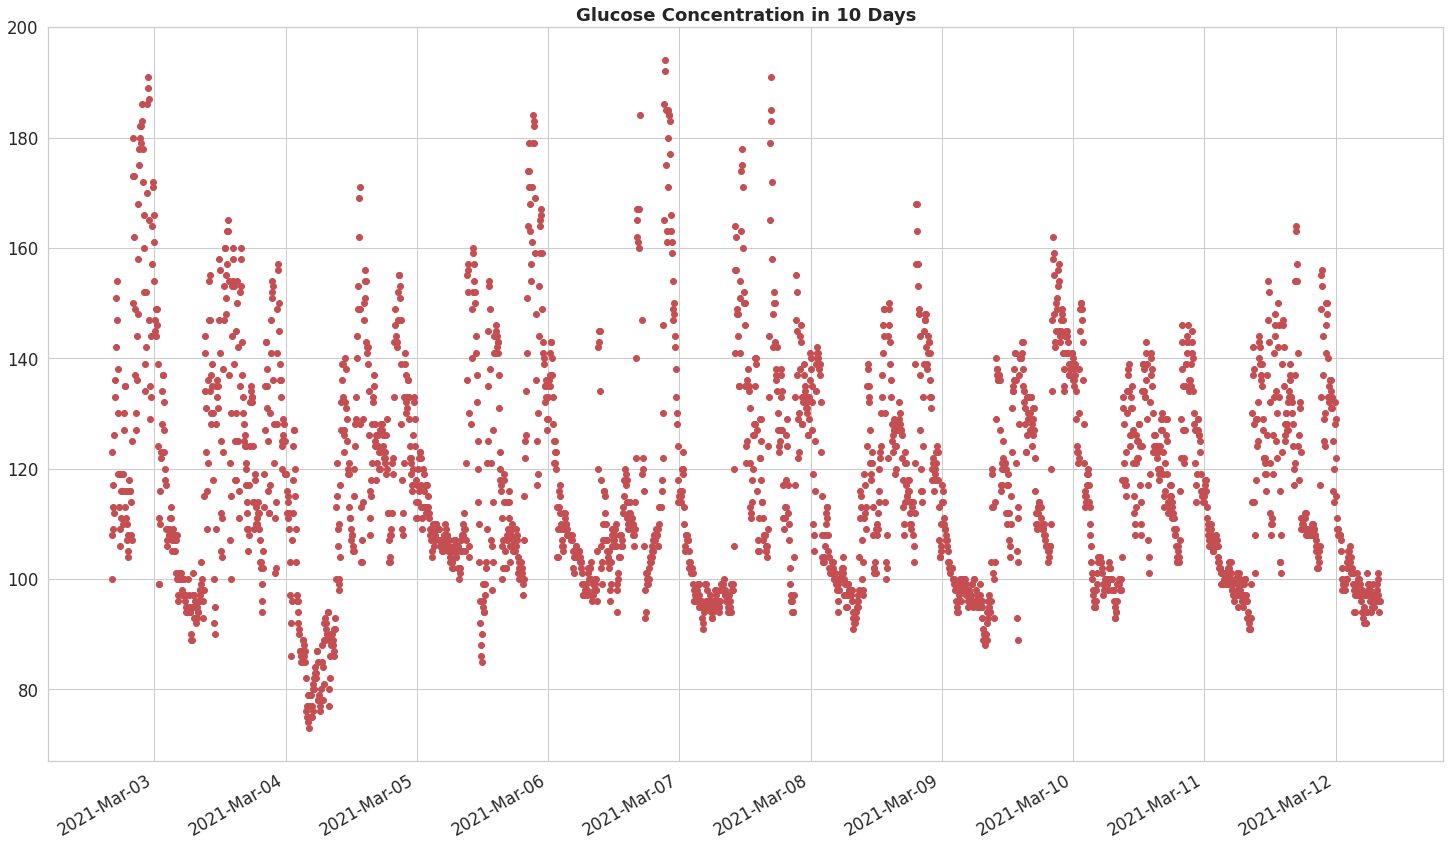

In [19]:
import datetime
import time
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange 
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

# convert to timestamp
timenp64 = [np.datetime64(time) for time in t]
#timestamp = np.array([datetime.datetime.timestamp(datetime.datetime.strptime(time,"%Y-%m-%dT%H:%M:%S")) for time in t])
fig, ax = plt.subplots(1, figsize=(25,15))
ax.plot_date(timenp64, glucose,'ro')

ax.xaxis.set_major_locator(DayLocator()) 
#ax.xaxis.set_minor_locator(HourLocator(range(0, 25, 6))) 

ax.xaxis.set_major_formatter(DateFormatter('%Y-%b-%d')) 
ax.fmt_xdata = DateFormatter('%Y-%b-%d %H:%M:%S')
fig.autofmt_xdate() 
plt.title('Glucose Concentration in 10 Days', fontweight ="bold") 
plt.show()

#### Sử dụng hàm read_csv rút gọn toàn bộ các bước ở phần trên

In [20]:
dataset = read_csv(file_path,
                   
                   parse_dates=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   index_col=['Timestamp (YYYY-MM-DDThh:mm:ss)'],
                   skiprows= [i for i in range(1,11)],
                   na_values= ['nan'])

Lưu ý: sử dụng tham số skiprows để bỏ bớt các hàng ta không muốn đọc. 

tham số na_values cho phép loại bỏ các điểm dữ liệu lỗi ngoài vùng dữ liệu ta mông muốn. 

Ở lệnh đọc này, cột timestamp được sử dụng làm cột chỉ số cho bảng dữ liệu. Ta hãy xem phần đầu của tập dataset sau khi đọc theo định dạng này như dưới đây

In [21]:
dataset.head()

,Index,Event Type,Event Subtype,Patient Info,Device Info,Source Device ID,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Duration (hh:mm:ss),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer),Transmitter ID
Timestamp (YYYY-MM-DDThh:mm:ss),,,,,,,,,,,,,
2021-03-02 16:05:02,11,EGV,NaN,NaN,NaN,PG00804102,116.0,NaN,NaN,NaN,NaN,2443273.0,8KMNYT
2021-03-02 16:10:01,12,EGV,NaN,NaN,NaN,PG00804102,108.0,NaN,NaN,NaN,NaN,2443573.0,8KMNYT
2021-03-02 16:15:02,13,EGV,NaN,NaN,NaN,PG00804102,100.0,NaN,NaN,NaN,NaN,2443873.0,8KMNYT
2021-03-02 16:15:52,14,Calibration,NaN,NaN,NaN,PG00804102,123.0,NaN,NaN,NaN,NaN,NaN,8KMNYT
2021-03-02 16:20:09,15,EGV,NaN,NaN,NaN,PG00804102,117.0,NaN,NaN,NaN,NaN,2444181.0,8KMNYT


In [22]:
dataset['Glucose Value (mg/dL)'].describe()

count    2792.000000
mean      117.746418
std        20.475908
min        73.000000
25%       102.000000
50%       113.000000
75%       132.000000
max       194.000000
Name: Glucose Value (mg/dL), dtype: float64

In [23]:
dataset.describe()

,Index,Patient Info,Device Info,Glucose Value (mg/dL),Insulin Value (u),Carb Value (grams),Glucose Rate of Change (mg/dL/min),Transmitter Time (Long Integer)
count,2806.000000,0.0,0.0,2792.000000,0.0,12.000000,0.0,2.779000e+03
mean,1413.500000,NaN,NaN,117.746418,NaN,84.583333,NaN,2.861050e+06
std,810.166752,NaN,NaN,20.475908,NaN,50.202242,NaN,2.414844e+05
min,11.000000,NaN,NaN,73.000000,NaN,10.000000,NaN,2.443273e+06
25%,712.250000,NaN,NaN,102.000000,NaN,35.000000,NaN,2.651323e+06
50%,1413.500000,NaN,NaN,113.000000,NaN,120.000000,NaN,2.861773e+06
75%,2114.750000,NaN,NaN,132.000000,NaN,120.000000,NaN,3.070123e+06
max,2816.000000,NaN,NaN,194.000000,NaN,150.000000,NaN,3.278473e+06


In [24]:
dataset.index

DatetimeIndex(['2021-03-02 16:05:02', '2021-03-02 16:10:01',
               '2021-03-02 16:15:02', '2021-03-02 16:15:52',
               '2021-03-02 16:20:09', '2021-03-02 16:25:02',
               '2021-03-02 16:30:02', '2021-03-02 16:35:02',
               '2021-03-02 16:40:02', '2021-03-02 16:45:02',
               ...
               '2021-03-12 07:20:25', '2021-03-12 07:25:23',
               '2021-03-12 07:30:25', '2021-03-12 07:35:24',
               '2021-03-12 07:40:25', '2021-03-12 07:45:24',
               '2021-03-12 07:50:24', '2021-03-12 07:55:24',
               '2021-03-12 08:00:24', '2021-03-12 08:05:25'],
              dtype='datetime64[ns]', name='Timestamp (YYYY-MM-DDThh:mm:ss)', length=2806, freq=None)

Biểu diễn dữ liệu

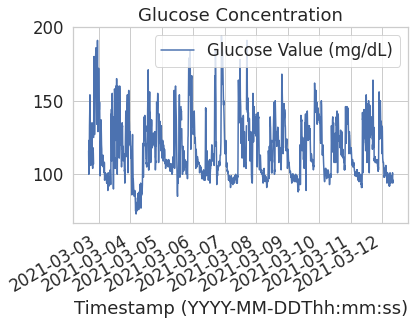

In [25]:
dataset.plot(y='Glucose Value (mg/dL)', title='Glucose Concentration')
plt.show()

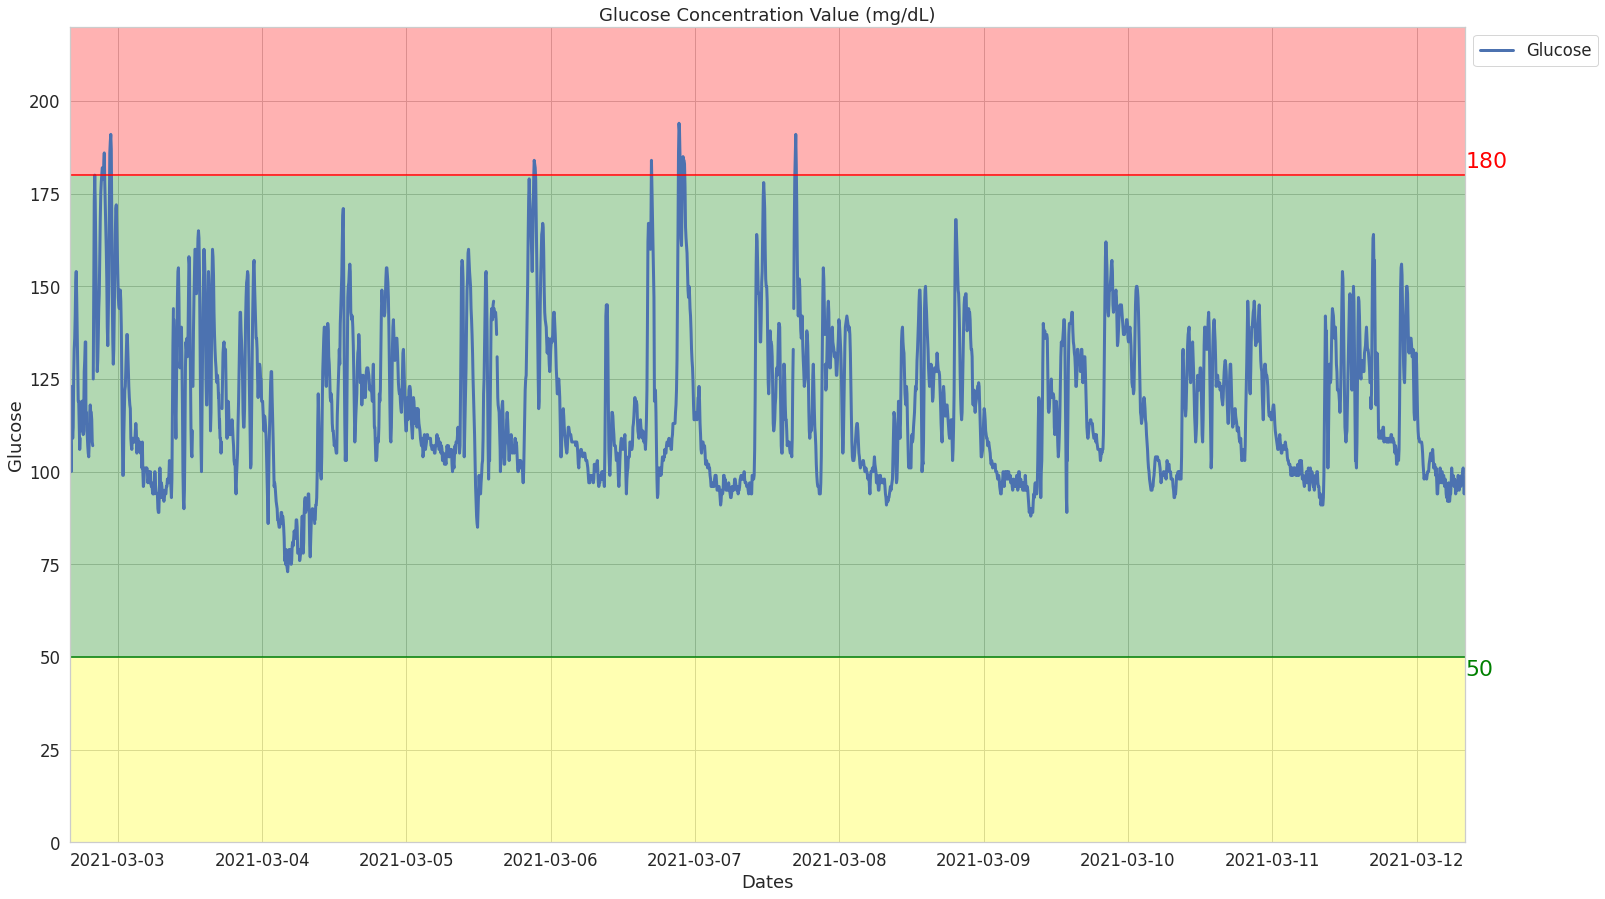

In [26]:
fig, ax = plt.subplots(1, figsize=(25,15))
plt.rc('grid', linestyle=':', color='b', linewidth=2)
ax.plot(dataset.index.values,
           dataset['Glucose Value (mg/dL)'], 'b',linewidth=3)
ax.margins(0) # remove default margins (matplotlib verision 2+)
ax.axhline(y =50, color = 'green')
ax.axhline(y =180, color = 'red')
ax.axhspan(0, 50, facecolor='yellow', alpha=0.3)
ax.axhspan(50, 180, facecolor='green', alpha=0.3)
ax.axhspan(180, 220, facecolor='red', alpha=0.3)
#ax.grid(axis = 'x', axis='y')
ax.grid(True)

#ax.legend(["Glucose"]) 
ax.legend(["Glucose"], bbox_to_anchor = (1 , 1))
# Add title and axis names
plt.title('Glucose Concentration Value (mg/dL)')
plt.xlabel('Dates')
plt.ylabel('Glucose')
# Add number as a marker
plt.text(dataset.index.values[-1], 182, "180", color="red", fontsize=22)
plt.text(dataset.index.values[-1], 45, "50", color="green", fontsize=22)
#plt.yablel('Glucose Concentration Value (mg/dL)') 
plt.show()

## Sử dụng hàm plotly đễ vẽ nhanh dữ liệu

Plotly cho phép vẽ dữ liệu với định dạng chuỗi 

In [27]:
import plotly.graph_objects as go

from pandas import read_csv

df = read_csv(file_path)
print(df.head)

fig = go.Figure([go.Scatter(x=df['Timestamp (YYYY-MM-DDThh:mm:ss)'], y=df['Glucose Value (mg/dL)'])])
#fig.update_layout(legend_title_text = "Glucose Concentration in 10 Days")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Glucose Value (mg/dL)")
#fig.update_xaxes(range=[1.5, 4.5])
fig.update_yaxes(range=[0, 250])

#fig.add_hline(y=50)
#fig.add_hline(y=180)


fig.show()

<bound method NDFrame.head of       Index  ... Transmitter ID
0         1  ...            NaN
1         2  ...            NaN
2         3  ...            NaN
3         4  ...            NaN
4         5  ...            NaN
...     ...  ...            ...
2811   2812  ...         8KMNYT
2812   2813  ...         8KMNYT
2813   2814  ...         8KMNYT
2814   2815  ...         8KMNYT
2815   2816  ...         8KMNYT

[2816 rows x 14 columns]>


In [28]:
import plotly.express as px

from pandas import read_csv

df = read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv')
#read_csv('drive/My Drive/Dataset/GlucoseLong02_12Mar.csv',usecols=['Timestamp (YYYY-MM-DDThh:mm:ss)','Glucose Value (mg/dL)'])
fig = px.scatter(df, x='Timestamp (YYYY-MM-DDThh:mm:ss)', y='Glucose Value (mg/dL)',title="Glucose in 10 days")
#fig.add_hline(y=50)
#fig.add_hline(y=50, color='yellow')

fig.show()

##Tóm tắt

Trong bài hướng dẫn này, bạn đã làm quen với các định dạng chuẩn datetime có trong Python, và sử dụng một số công cụ chuyển đổi chuỗi sang đối tượng thời gian để python có thể biểu diễn được nhờ thông qua định dạng **datetime64** hoặc ta có thể vẽ nhanh qua gói thư viện sẵn có **plotly**

Ở phần tiếp theo, ta sẽ tìm hiểu cách làm sao để đồng bộ giữa các dữ liệu từ nhiều nguồn khác nhau. 
